In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import tensorflow as tf

In [2]:
# Upload train dataset
train = pd.read_csv('C:/Users/visha/OneDrive/Desktop/MNIST_CSV/mnist_train.csv')

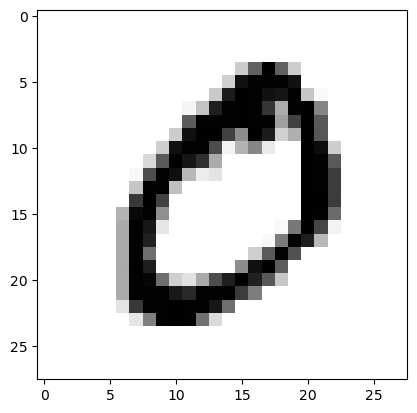

In [4]:
# Reshape the pixel values into 28x28x1 arrays
labels_train = train.iloc[:, 0]
pixels_train = train.iloc[:, 1:]

pixels_reshaped_train = pixels_train.values.reshape(-1, 28, 28, 1)
img_idx = 0  
img = pixels_reshaped_train[img_idx, :, :, 0]  # extract the 2D image (28x28)
plt.imshow(img, cmap=plt.cm.binary)  
plt.show()

In [5]:
# Upload test dataset
test= pd.read_csv('C:/Users/visha/OneDrive/Desktop/MNIST_CSV/mnist_test.csv')
pixels_test= test.iloc[:, 1:]
pixels_reshaped_test = pixels_test.values.reshape(-1, 28, 28, 1)
labels_test = test.iloc[:, 0]

In [8]:
# Import keras models
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [9]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
# Train the model on the training data
model.fit(pixels_reshaped_train,labels_train, epochs=5, validation_split = 0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.9458 - loss: 0.1916 - val_accuracy: 0.9657 - val_loss: 0.1036
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 31s 24ms/step - accuracy: 0.9738 - loss: 0.0877 - val_accuracy: 0.9766 - val_loss: 0.0817
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 31s 24ms/step - accuracy: 0.9788 - loss: 0.0708 - val_accuracy: 0.9774 - val_loss: 0.0783
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 31s 24ms/step - accuracy: 0.9827 - loss: 0.0549 - val_accuracy: 0.9765 - val_loss: 0.0852
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 31s 24ms/step - accuracy: 0.9842 - loss: 0.0502 - val_accuracy: 0.9815 - val_loss: 0.0689


In [15]:
# Evaluate the model on the testing data
loss, accuracy = model.evaluate(pixels_reshaped_test,labels_test)
print(loss)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9774 - loss: 0.0872
0.06897882372140884
0.9805980324745178


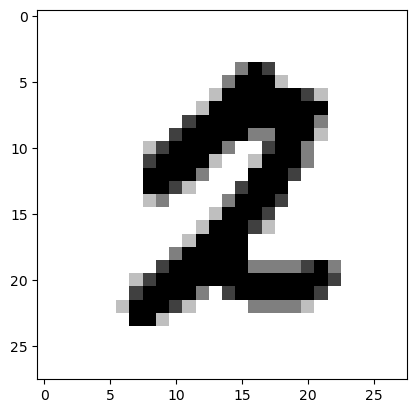

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Our model says it is: 2


In [20]:
# Prediction of Handwritten numbers
idx = random.randrange(0,len(pixels_reshaped_test))
plt.imshow(pixels_reshaped_test[idx], cmap = plt.cm.binary)
plt.show()

predictions= model.predict([pixels_reshaped_test])
print(f'Our model says it is:' ,np.argmax(predictions[idx]))